In [2]:
import warnings                                  # `do not disturbe` mode
warnings.filterwarnings('ignore')

import numpy as np                               # vectors and matrices
import pandas as pd                              # tables and data manipulations
import matplotlib.pyplot as plt                  # plots
import seaborn as sns                            # more plots

from dateutil.relativedelta import relativedelta # working with dates with style
from scipy.optimize import minimize              # for function minimization

import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

from itertools import product                    # some useful functions
from tqdm import tqdm_notebook
%matplotlib inline

In [3]:
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
confirmed = pd.read_csv(url, error_bad_lines=False)
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'
death = pd.read_csv(url, error_bad_lines=False)
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv'
recover = pd.read_csv(url, error_bad_lines=False)

In [4]:
# fix region names
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("Bd", "Bangladesh")
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("US", "United States")
death['Country/Region']= death['Country/Region'].str.replace("Bd", "Bangladesh")
death['Country/Region']= death['Country/Region'].str.replace("US", "United States")
recover['Country/Region']= recover['Country/Region'].str.replace("Bd", "Bangladesh")
recover['Country/Region']= recover['Country/Region'].str.replace("US", "United States")

In [5]:
confirmed.head(92)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,59,70,75,82,114,147,177,212,272,322
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,639,639,701,773,839,825,878,889,924,963
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,178,178,200,212,226,243,266,313,345,385
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,149,149,197,238,428,566,673,790,900,1030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,NaN,Martinique,14.6415,-61.0242,0,0,0,0,0,0,...,3,3,3,9,9,15,16,19,23,32
88,NaN,Bulgaria,42.7339,25.4858,0,0,0,0,0,0,...,7,7,23,41,51,52,67,92,94,127
89,NaN,Maldives,3.2028,73.2207,0,0,0,0,0,0,...,8,8,9,10,13,13,13,13,13,13
90,NaN,Bangladesh,23.6850,90.3563,0,0,0,0,0,0,...,3,3,3,3,5,8,10,14,17,20


In [6]:
confirmed.columns[ :]

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20'],
      dtype='object')

In [7]:
confirmed.shape[:]

(477, 63)

In [8]:
confirmed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 477 entries, 0 to 476
Data columns (total 63 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  324 non-null    object 
 1   Country/Region  477 non-null    object 
 2   Lat             477 non-null    float64
 3   Long            477 non-null    float64
 4   1/22/20         477 non-null    int64  
 5   1/23/20         477 non-null    int64  
 6   1/24/20         477 non-null    int64  
 7   1/25/20         477 non-null    int64  
 8   1/26/20         477 non-null    int64  
 9   1/27/20         477 non-null    int64  
 10  1/28/20         477 non-null    int64  
 11  1/29/20         477 non-null    int64  
 12  1/30/20         477 non-null    int64  
 13  1/31/20         477 non-null    int64  
 14  2/1/20          477 non-null    int64  
 15  2/2/20          477 non-null    int64  
 16  2/3/20          477 non-null    int64  
 17  2/4/20          477 non-null    int

In [9]:
confirmed.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20
count,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,...,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000
mean,30.965553,-34.570313,1.163522,1.368973,1.972746,3.006289,4.440252,6.136268,11.693920,12.926625,...,263.867925,269.062893,304.387841,327.241090,351.039832,380.559748,413.295597,450.545073,508.821803,570.578616
std,19.385460,80.867134,20.380480,20.464206,25.491333,35.494318,49.618662,66.864314,163.876281,164.945181,...,3203.250317,3210.902126,3282.164460,3343.813157,3415.121855,3499.569759,3597.937557,3731.764976,3926.788893,4163.404218
min,-41.454500,-157.858400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.027500,-92.288400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.648900,-74.053500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000,4.000000
75%,42.230200,21.745300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,13.000000,18.000000,26.000000,32.000000,45.000000,60.000000,71.000000,86.000000,96.000000
max,71.706900,178.065000,444.000000,444.000000,549.000000,761.000000,1058.000000,1423.000000,3554.000000,3554.000000,...,67773.000000,67781.000000,67786.000000,67790.000000,67794.000000,67798.000000,67799.000000,67800.000000,67800.000000,67800.000000


In [10]:
confirmed.describe(include=['object', 'bool'])

,Province/State,Country/Region
count,324,477
unique,322,162
top,Grand Princess,United States
freq,2,247


In [11]:
confirmed['3/20/20'].value_counts()

0       192
1        22
2        13
3        11
6         6
       ... 
234       1
233       1
1255      1
230       1
149       1
Name: 3/20/20, Length: 173, dtype: int64

In [12]:
confirmed['3/20/20'].value_counts(normalize=True)

0       0.402516
1       0.046122
2       0.027254
3       0.023061
6       0.012579
          ...   
234     0.002096
233     0.002096
1255    0.002096
230     0.002096
149     0.002096
Name: 3/20/20, Length: 173, dtype: float64

In [13]:
confirmed.sort_values(by='3/20/20', ascending=False).head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20
154,Hubei,China,30.9756,112.2707,444,444,549,761,1058,1423,...,67773,67781,67786,67790,67794,67798,67799,67800,67800,67800
16,NaN,Italy,43.0000,12.0000,0,0,0,0,0,0,...,12462,12462,17660,21157,24747,27980,31506,35713,41035,47021
18,NaN,Spain,40.0000,-4.0000,0,0,0,0,0,0,...,2277,2277,5232,6391,7798,9942,11748,13910,17963,20410
11,NaN,Germany,51.0000,9.0000,0,0,0,0,0,1,...,1908,2078,3675,4585,5795,7272,9257,12327,15320,19848
155,NaN,Iran,32.0000,53.0000,0,0,0,0,0,0,...,9000,10075,11364,12729,13938,14991,16169,17361,18407,19644


In [14]:
confirmed.sort_values(by=['Country/Region','3/20/20'], ascending=[False,True]).head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20
476,NaN,Zimbabwe,-20.0000,30.0000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
456,NaN,Zambia,-15.4167,28.2833,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,2,2
191,NaN,Vietnam,16.0000,108.0000,0,2,2,2,2,2,...,38,39,47,53,56,61,66,75,85,91
421,NaN,Venezuela,6.4238,-66.5897,0,0,0,0,0,0,...,0,0,0,2,10,17,33,36,42,42
439,NaN,Uzbekistan,41.3775,64.5853,0,0,0,0,0,0,...,0,0,0,0,1,6,10,15,23,33


In [15]:
confirmed['3/20/20'].mean()

570.5786163522013

In [16]:
confirmed[confirmed['3/20/20'] == 1].mean()

Lat        11.622786
Long       10.306082
1/22/20     0.000000
1/23/20     0.000000
1/24/20     0.000000
             ...    
3/16/20     0.363636
3/17/20     0.409091
3/18/20     0.500000
3/19/20     0.681818
3/20/20     1.000000
Length: 61, dtype: float64

In [17]:
confirmed.loc[0:5]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,59,70,75,82,114,147,177,212,272,322
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,639,639,701,773,839,825,878,889,924,963
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,178,178,200,212,226,243,266,313,345,385
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,149,149,197,238,428,566,673,790,900,1030
5,British Columbia,Canada,49.2827,-123.1207,0,0,0,0,0,0,...,39,46,64,64,73,103,103,186,231,271


In [18]:
confirmed.iloc[0:5, 55:]

,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20
0,75,82,114,147,177,212,272,322
1,701,773,839,825,878,889,924,963
2,200,212,226,243,266,313,345,385
3,1,1,1,1,1,1,1,1
4,197,238,428,566,673,790,900,1030


In [19]:
confirmed[:-1]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,59,70,75,82,114,147,177,212,272,322
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,639,639,701,773,839,825,878,889,924,963
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,178,178,200,212,226,243,266,313,345,385
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,149,149,197,238,428,566,673,790,900,1030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,NaN,Cabo Verde,16.5388,-23.0418,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
472,Sint Maarten,Netherlands,18.0425,-63.0548,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
473,NaN,Niger,17.6078,8.0817,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
474,NaN,Papua New Guinea,-6.3150,143.9555,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [20]:
confirmed[-1:]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20
476,NaN,Zimbabwe,-20.0,30.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [21]:
# some imports to set up plotting 
import matplotlib.pyplot as plt
# pip install seaborn 
import seaborn as sns
# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'

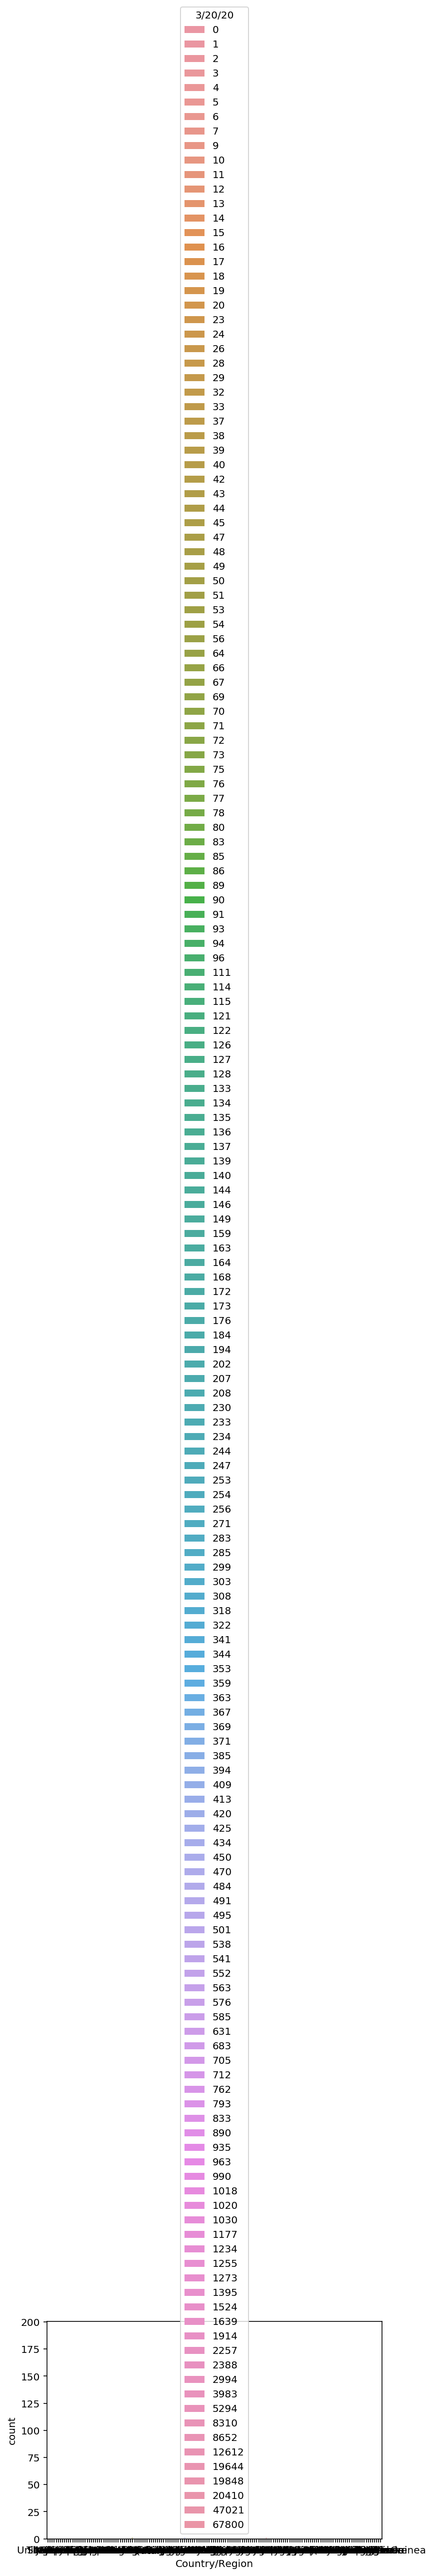

In [22]:
sns.countplot(x='Country/Region', hue='3/20/20', data=confirmed)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E63397D908>]],
      dtype=object)

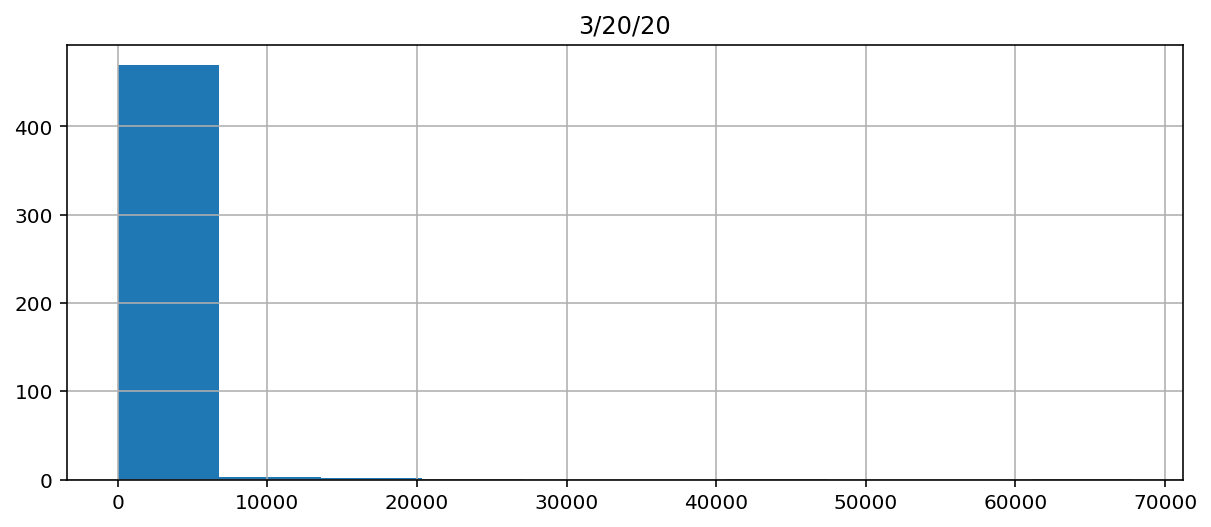

In [24]:
features = ['Country/Region', '3/20/20']
confirmed[features].hist(figsize=(10, 4))

In [25]:
df = confirmed

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E633D4EC48>,
      dtype=object)

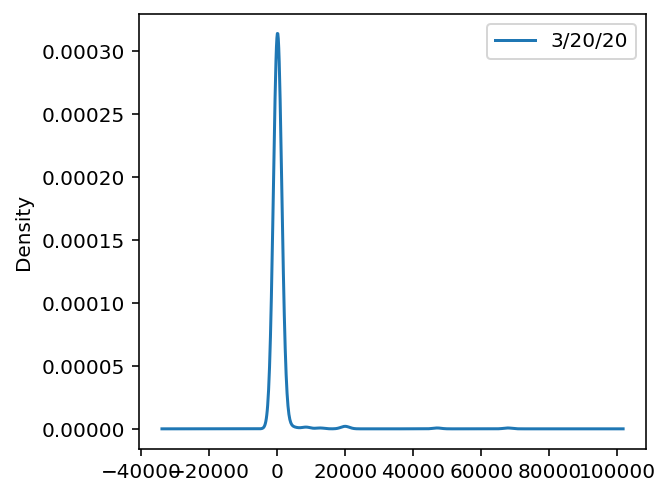

In [26]:
df[features].plot(kind='density', subplots=True, layout=(1, 2), 
                  sharex=False, figsize=(10, 4))

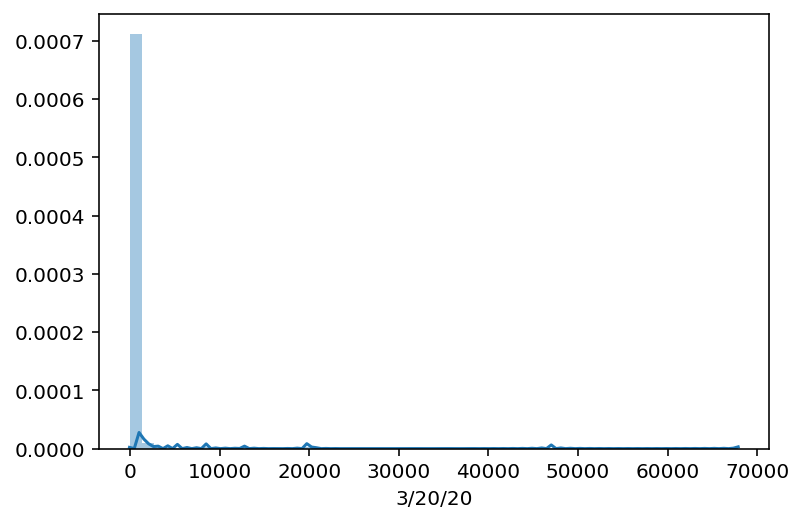

In [27]:
sns.distplot(df['3/20/20'])

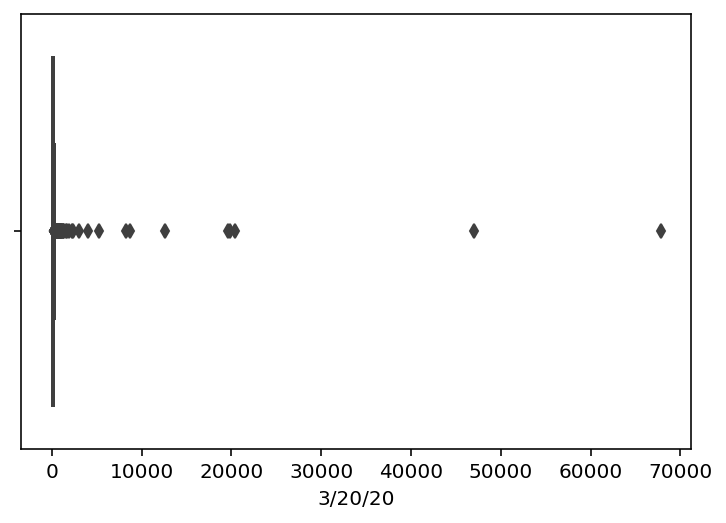

In [28]:
sns.boxplot(x='3/20/20', data=df)

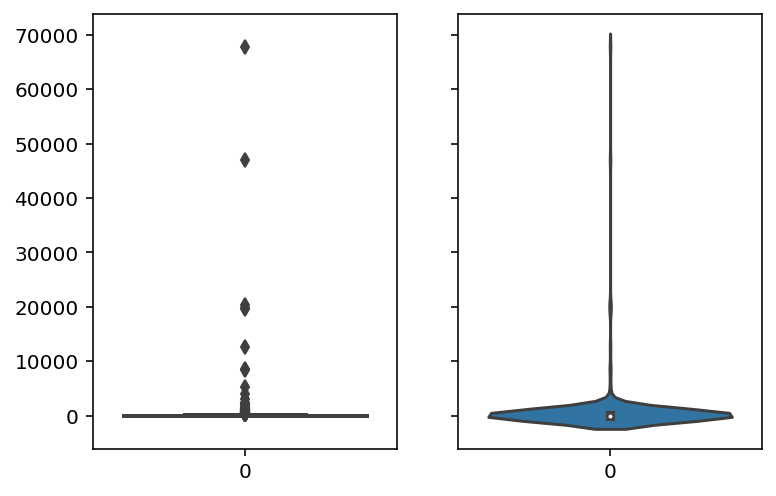

In [29]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(data=df['3/20/20'], ax=axes[0])
sns.violinplot(data=df['3/20/20'], ax=axes[1])

In [30]:
df[features].describe()

,3/20/20
count,477.000000
mean,570.578616
std,4163.404218
min,0.000000
25%,0.000000
50%,4.000000
75%,96.000000
max,67800.000000


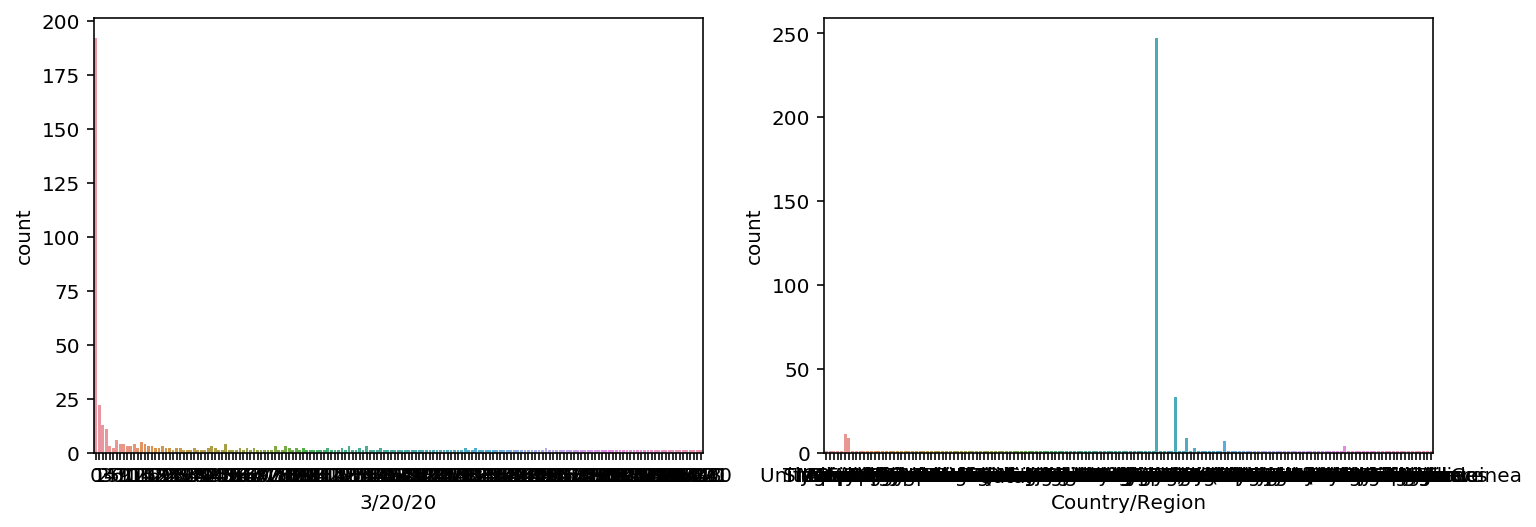

In [31]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
sns.countplot(x='3/20/20', data=df, ax=axes[0]);
sns.countplot(x='Country/Region', data=df, ax=axes[1]);

In [32]:
numerical = list(set(df.columns) - 
                 set(['Province/State', 'Country/Region', 'Lat', 
                      'Long']))

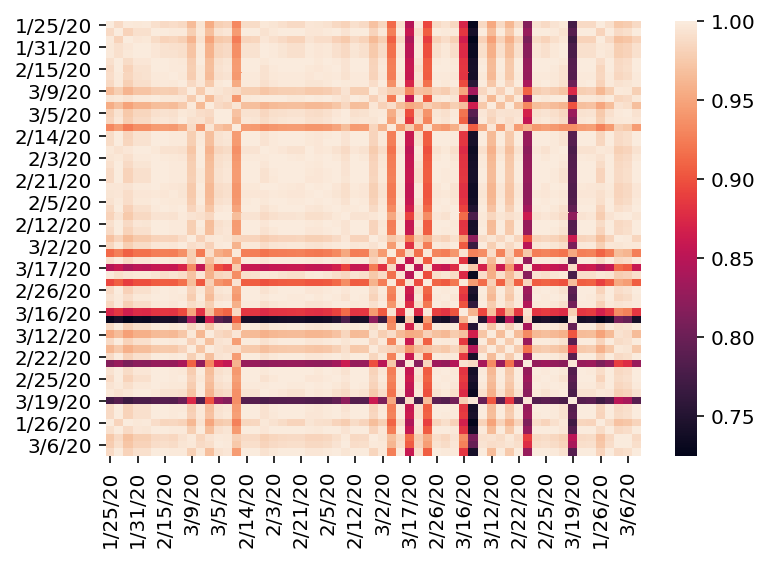

In [33]:
# Calculate and plot
corr_matrix = df[numerical].corr()
sns.heatmap(corr_matrix)

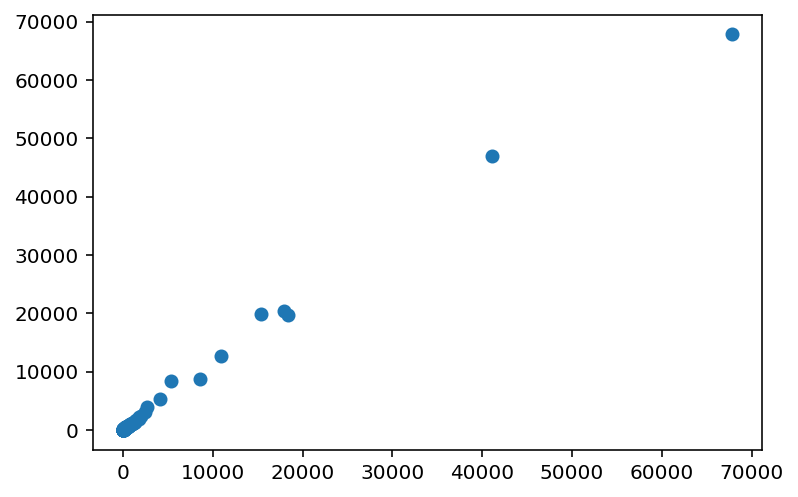

In [34]:
plt.scatter(df['3/19/20'], df['3/20/20'])

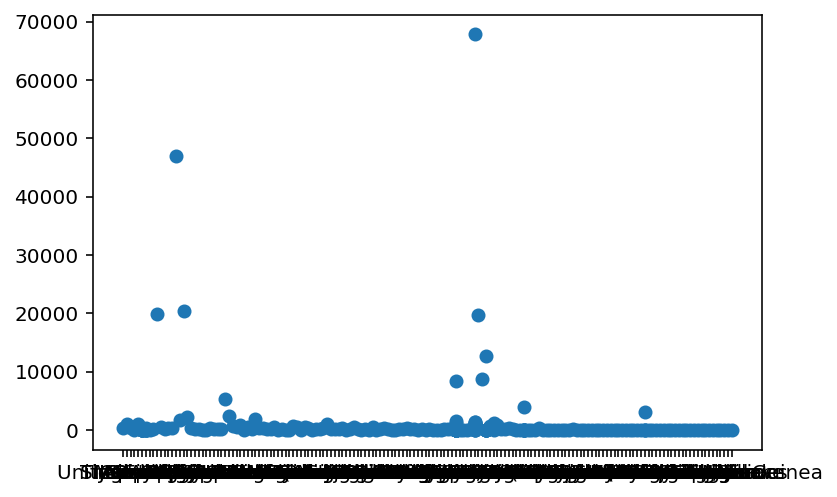

In [35]:
plt.scatter(df['Country/Region'], df['3/20/20'])

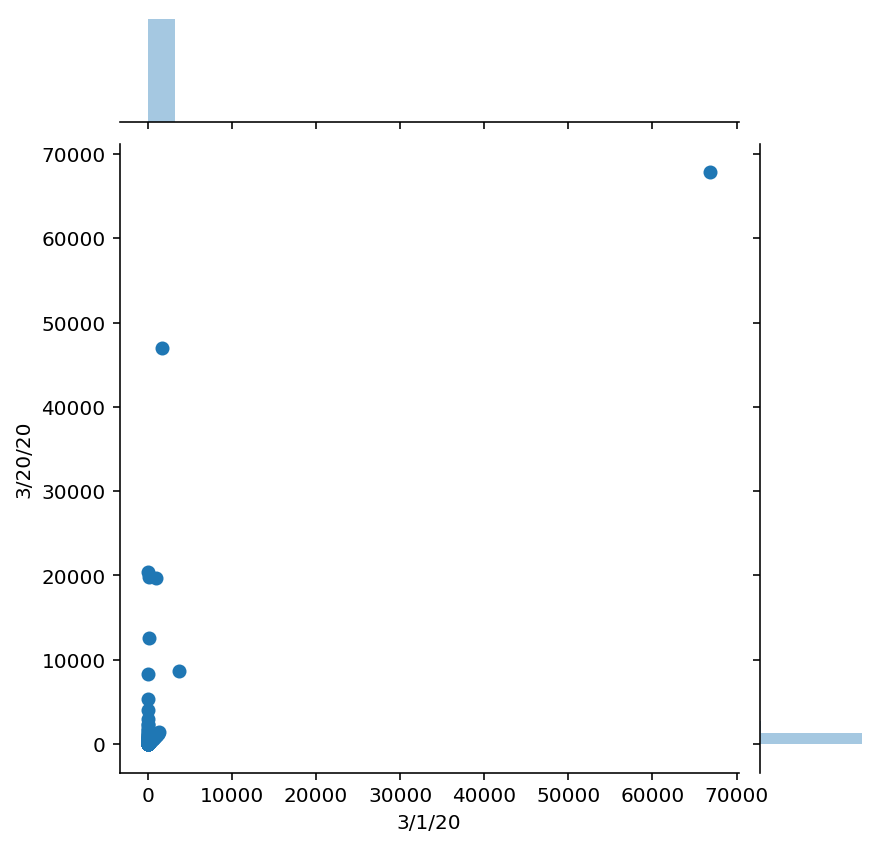

In [36]:
sns.jointplot(x='3/1/20', y='3/20/20', 
              data=df, kind='scatter')

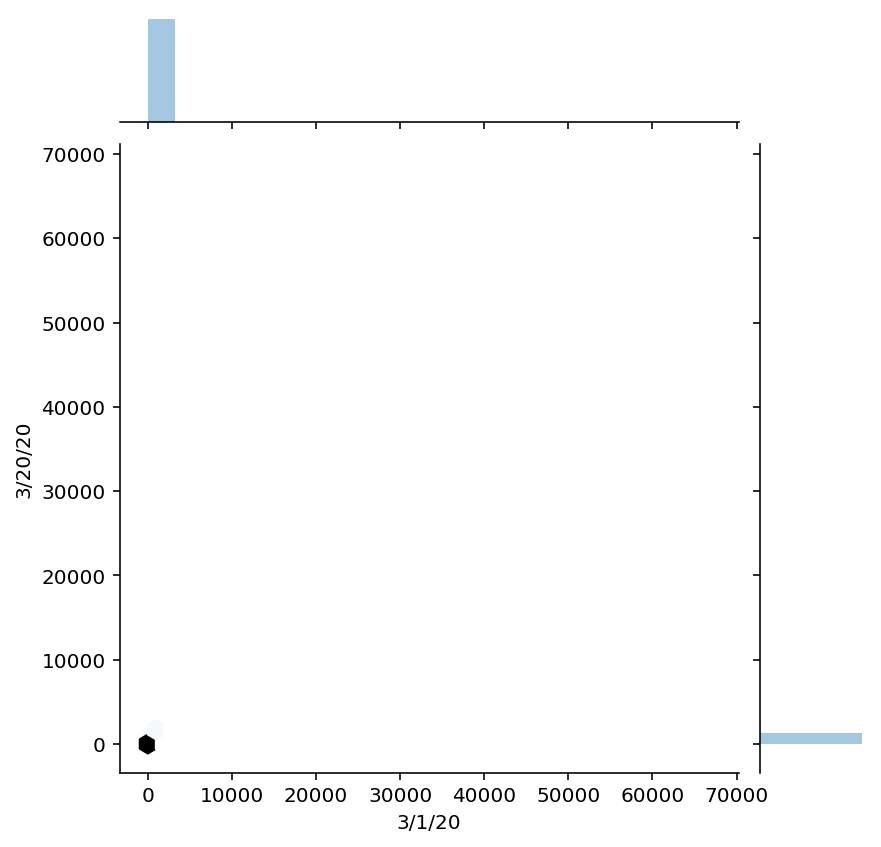

In [37]:
sns.jointplot(x='3/1/20', y='3/20/20', 
              data=df, kind='hex')

In [ ]:
# `pairplot()` may become very slow with the SVG or retina format
%config InlineBackend.figure_format = 'png'
sns.pairplot(df[numerical]);

In [38]:
%config InlineBackend.figure_format = 'retina'

In [ ]:
sns.lmplot('3/1/20', '3/20/20', data=df, hue='Country/Region', fit_reg=False)